In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# Load the data
url = "https://raw.githubusercontent.com/rittiin/healthdata/main/dataset_43file_health.csv"
df = pd.read_csv(url)
df

,year,month,week,province,disease,cases
0,2018,1,1,39,copd,125
1,2018,1,1,94,ihd,29
2,2018,1,1,75,asthma,2
3,2018,1,1,14,ihd,38
4,2018,1,1,25,copd,90
...,...,...,...,...,...,...
74900,2023,1,52,33,ihd,4
74901,2023,1,52,44,copd,18
74902,2023,1,52,80,asthma,2
74903,2023,1,52,48,ihd,7


# Convert the year and week columns to datetime format and extract year and month values

In [3]:
df["date"] = pd.to_datetime(df["year"].astype(str) + df["week"].astype(str) + "0", format="%Y%W%w")
df

,year,month,week,province,disease,cases,date
0,2018,1,1,39,copd,125,2018-01-07
1,2018,1,1,94,ihd,29,2018-01-07
2,2018,1,1,75,asthma,2,2018-01-07
3,2018,1,1,14,ihd,38,2018-01-07
4,2018,1,1,25,copd,90,2018-01-07
...,...,...,...,...,...,...,...
74900,2023,1,52,33,ihd,4,2023-12-31
74901,2023,1,52,44,copd,18,2023-12-31
74902,2023,1,52,80,asthma,2,2023-12-31
74903,2023,1,52,48,ihd,7,2023-12-31


# Filter the data for Province 50 เชียงใหม่ and ipd cases

In [4]:
# Filter the data for province 50 and COPD cases
df_copd = df.loc[(df["province"] == '50') & (df["disease"] == "copd"), :]
df_monthly = df_copd.groupby(pd.Grouper(key="date", freq="M")).sum()["cases"].reset_index().set_index('date')
df_monthly

,cases
date,
2018-01-31,4870
2018-02-28,5194
2018-03-31,5139
2018-04-30,5947
2018-05-31,4995
...,...
2023-08-31,0
2023-09-30,0
2023-10-31,0


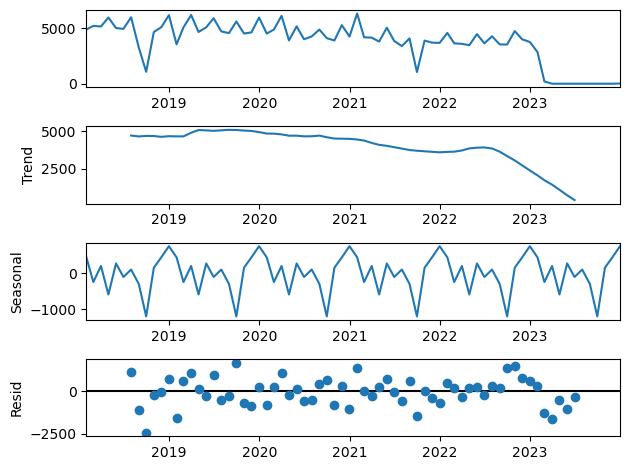

In [5]:
# Perform seasonal decomposition on the monthly data
result = seasonal_decompose(df_monthly)
result.plot()
plt.show()

# Create training and test data sets

In [6]:
train = df_monthly['2018-01-31':'2021-12-31']
test = df_monthly['2022-01-31':'2022-12-31']


In [7]:
train['cases']

date
2018-01-31    4870
2018-02-28    5194
2018-03-31    5139
2018-04-30    5947
2018-05-31    4995
2018-06-30    4927
2018-07-31    5972
2018-08-31    3255
2018-09-30    1067
2018-10-31    4646
2018-11-30    5072
2018-12-31    6158
2019-01-31    3538
2019-02-28    5064
2019-03-31    6170
2019-04-30    4647
2019-05-31    5063
2019-06-30    5882
2019-07-31    4696
2019-08-31    4545
2019-09-30    5587
2019-10-31    4506
2019-11-30    4609
2019-12-31    5947
2020-01-31    4503
2020-02-29    4865
2020-03-31    6094
2020-04-30    3889
2020-05-31    5153
2020-06-30    3993
2020-07-31    4248
2020-08-31    4861
2020-09-30    4092
2020-10-31    3885
2020-11-30    5260
2020-12-31    4235
2021-01-31    6305
2021-02-28    4169
2021-03-31    4139
2021-04-30    3783
2021-05-31    5026
2021-06-30    3838
2021-07-31    3379
2021-08-31    4070
2021-09-30    1047
2021-10-31    3874
2021-11-30    3689
2021-12-31    3670
Name: cases, dtype: int64

In [67]:
train['cases']  = np.where(train['cases'] < 3500, np.mean(train['cases']) + np.std(train['cases']),train['cases'])
train

/tmp/ipykernel_17818/2314557681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cases']  = np.where(train['cases'] < 3500, np.mean(train['cases']) + np.std(train['cases']),train['cases'])


,cases
date,
2018-01-31,4870.000000
2018-02-28,5194.000000
2018-03-31,5139.000000
2018-04-30,5947.000000
2018-05-31,4995.000000
2018-06-30,4927.000000
2018-07-31,5972.000000
2018-08-31,5586.078878
2018-09-30,5658.581244


In [68]:
test['cases']

date
2022-01-31    4565
2022-02-28    3628
2022-03-31    3580
2022-04-30    3461
2022-05-31    4454
2022-06-30    3632
2022-07-31    4257
2022-08-31    3533
2022-09-30    3519
2022-10-31    4727
2022-11-30    3987
2022-12-31    3748
Name: cases, dtype: int64

## Best model : ARIMA

In [69]:
import pmdarima as pm
#train_5ma = train.rolling(5,center=True).mean()[2:-2]
model = pm.auto_arima(train, start_p=0, start_q=0,
                      test='adf',
                      max_p=5, max_q=5,
                      m=12,             
                      d=1,          
                      seasonal=True,   
                      D=1, 
                      trace=True,
                      error_action='ignore')#,  
                      #suppress_warnings=True, 
                      #stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=614.080, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=602.122, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=603.924, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=592.498, Time=0.33 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=600.761, Time=0.21 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=587.308, Time=0.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=588.128, Time=0.09 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=589.018, Time=0.60 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=589.296, Time=0.47 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=589.295, T

In [104]:
#prediction = pd.DataFrame(model.predict(n_periods =12),index=test.index)
#prediction.columns = ['predicted_sales']

#plt.figure(figsize=(8,5))
#plt.plot(train,label="Training")
#plt.plot(test, label="Test")
#plt.plot(prediction,label="Predicted")#plt.show()

# ARIMA model on the training data

In [105]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(2, 1, 0),seasonal_order=(2, 1, 1, 12))
#model = ARIMA(train, order=(0, 1, 1))

#model = ARIMA(train, order=(3, 1, 1),seasonal_order=(2, 1, 1, 12))
fit = model.fit()
forecast = fit.forecast(steps=len(test))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [106]:
print(forecast)

2022-01-31    4629.577450
2022-02-28    3559.490496
2022-03-31    3943.160773
2022-04-30    3606.428359
2022-05-31    4071.876190
2022-06-30    3725.210734
2022-07-31    4565.501106
2022-08-31    3593.744970
2022-09-30    4753.828307
2022-10-31    3351.456893
2022-11-30    3293.916799
2022-12-31    3751.024523
Freq: M, Name: predicted_mean, dtype: float64


# SARIMA model on the training data

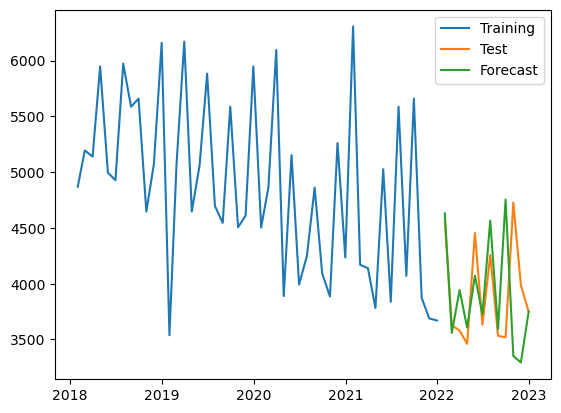

In [107]:
import matplotlib.pyplot as plt

plt.plot(train.index, train.values, label="Training")
plt.plot(test.index, test.values, label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.show()


In [108]:
# mape : Mean absolute percentage error

df_error = pd.concat([test,forecast], axis =1)
df_error['error'] = df_error['cases'] - df_error['predicted_mean']
df_error['abs_error'] = np.abs(df_error['error'])
df_error['sum_error'] = df_error['abs_error'].sum()
df_error['mean_abs_error'] = df_error['sum_error']/len(df_error['sum_error'])
df_error['mape_each'] = df_error['abs_error']/df_error['cases']*100
df_error['mape'] = df_error['mape_each'].sum()/len(df_error)
df_error

,cases,predicted_mean,error,abs_error,sum_error,mean_abs_error,mape_each,mape
2022-01-31,4565,4629.577450,-64.577450,64.577450,4792.735844,399.394654,1.414621,9.951278
2022-02-28,3628,3559.490496,68.509504,68.509504,4792.735844,399.394654,1.888355,9.951278
2022-03-31,3580,3943.160773,-363.160773,363.160773,4792.735844,399.394654,10.144156,9.951278
2022-04-30,3461,3606.428359,-145.428359,145.428359,4792.735844,399.394654,4.201917,9.951278
2022-05-31,4454,4071.876190,382.123810,382.123810,4792.735844,399.394654,8.579340,9.951278
2022-06-30,3632,3725.210734,-93.210734,93.210734,4792.735844,399.394654,2.566375,9.951278
2022-07-31,4257,4565.501106,-308.501106,308.501106,4792.735844,399.394654,7.246913,9.951278
2022-08-31,3533,3593.744970,-60.744970,60.744970,4792.735844,399.394654,1.719359,9.951278
2022-09-30,3519,4753.828307,-1234.828307,1234.828307,4792.735844,399.394654,35.090318,9.951278
2022-10-31,4727,3351.456893,1375.543107,1375.543107,4792.735844,399.394654,29.099706,9.951278


# ARIMA model on the training data

In [109]:
from statsmodels.tsa.arima.model import ARIMA
#model = ARIMA(train, order=(2, 1, 0),seasonal_order=(2, 1, 1, 12))
model = ARIMA(train, order=(0, 1, 1))

#model = ARIMA(train, order=(3, 1, 1),seasonal_order=(2, 1, 1, 12))
fit = model.fit()
forecast = fit.forecast(steps=len(test))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [110]:
print(forecast)

2022-01-31    4429.201347
2022-02-28    4429.201347
2022-03-31    4429.201347
2022-04-30    4429.201347
2022-05-31    4429.201347
2022-06-30    4429.201347
2022-07-31    4429.201347
2022-08-31    4429.201347
2022-09-30    4429.201347
2022-10-31    4429.201347
2022-11-30    4429.201347
2022-12-31    4429.201347
Freq: M, Name: predicted_mean, dtype: float64


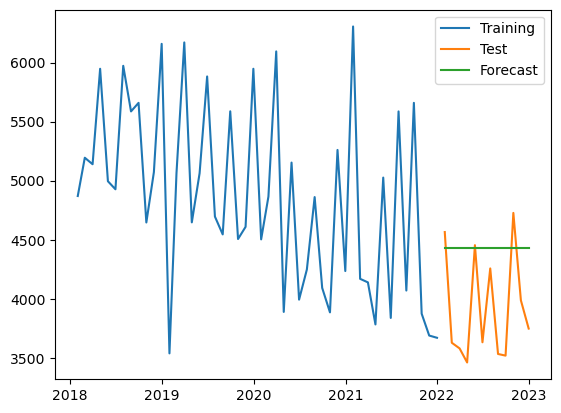

In [111]:
import matplotlib.pyplot as plt

plt.plot(train.index, train.values, label="Training")
plt.plot(test.index, test.values, label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.show()

In [112]:
# mape : Mean absolute percentage error

df_error = pd.concat([test,forecast], axis =1)
df_error['error'] = df_error['cases'] - df_error['predicted_mean']
df_error['abs_error'] = np.abs(df_error['error'])
df_error['sum_error'] = df_error['abs_error'].sum()
df_error['mean_abs_error'] = df_error['sum_error']/len(df_error['sum_error'])
df_error['mape_each'] = df_error['abs_error']/df_error['cases']*100
df_error['mape'] = df_error['mape_each'].sum()/len(df_error)
df_error

,cases,predicted_mean,error,abs_error,sum_error,mean_abs_error,mape_each,mape
2022-01-31,4565,4429.201347,135.798653,135.798653,6976.208083,581.350674,2.974779,15.841936
2022-02-28,3628,4429.201347,-801.201347,801.201347,6976.208083,581.350674,22.083830,15.841936
2022-03-31,3580,4429.201347,-849.201347,849.201347,6976.208083,581.350674,23.720708,15.841936
2022-04-30,3461,4429.201347,-968.201347,968.201347,6976.208083,581.350674,27.974613,15.841936
2022-05-31,4454,4429.201347,24.798653,24.798653,6976.208083,581.350674,0.556773,15.841936
2022-06-30,3632,4429.201347,-797.201347,797.201347,6976.208083,581.350674,21.949376,15.841936
2022-07-31,4257,4429.201347,-172.201347,172.201347,6976.208083,581.350674,4.045134,15.841936
2022-08-31,3533,4429.201347,-896.201347,896.201347,6976.208083,581.350674,25.366582,15.841936
2022-09-30,3519,4429.201347,-910.201347,910.201347,6976.208083,581.350674,25.865341,15.841936
2022-10-31,4727,4429.201347,297.798653,297.798653,6976.208083,581.350674,6.299950,15.841936
